In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,  font_manager
import matplotlib
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import statistics
matplotlib.rcParams['axes.unicode_minus'] = False
fontname = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=fontname).get_name()
rc('font', family=font_name)

In [324]:
# year_df = pd.read_csv('../data/TEMP/경락가격/애호박/애호박 년별 평균가격.csv', index_col=None)
get_data = pd.read_csv('../data/TEMP/경락가격/애호박/애호박 월별 총거래(정제2).csv', index_col=None)

In [280]:
get_data

,Date,서울 총거래물량,서울 총거래금액,서울 평균단가,부산 총거래물량,부산 총거래금액,부산 평균단가,대구 총거래물량,대구 총거래금액,대구 평균단가,대전 총거래물량,대전 총거래금액,대전 평균단가,광주 총거래물량,광주 총거래금액,광주 평균단가
0,2020-01-01,2780377.65,9830108400,3535.529931,314022.5,1158346710,3688.737941,810553.0,2032616500,2507.691045,430426.0,1337955110,3108.443983,478129.0,1644281360,3438.991067
1,2020-02-01,2720669.88,9024401700,3316.977839,331341.0,1143201466,3450.226401,827334.0,1977870900,2390.655890,406261.0,1228049490,3022.809204,451781.0,1441064160,3189.740516
2,2020-03-01,3739541.28,9722242800,2599.849038,435282.4,1220358529,2803.601820,978456.0,1935109400,1977.717342,520843.0,1246237300,2392.731207,587348.0,1509172300,2569.468697
3,2020-04-01,5703989.95,7969557560,1397.189972,607195.5,995696080,1639.827831,1427859.0,1686934100,1181.443056,615618.0,884077957,1436.082046,800667.0,1154068030,1441.383284
4,2020-05-01,5487463.43,7107073600,1295.147328,644394.2,875168986,1358.126727,1371680.0,1533032100,1117.631007,631163.0,818889984,1297.430274,759615.0,938017136,1234.858627
5,2020-06-01,5435012.79,6912510040,1271.847980,556802.2,827896497,1486.877202,1417036.0,1587006500,1119.947905,623977.0,715574424,1146.796154,715343.0,967870900,1353.016525
6,2020-07-01,4369081.64,6969965000,1595.292918,517931.6,935421697,1806.071877,1249719.0,1564919100,1252.216778,554574.0,806098452,1453.545338,545036.0,885620930,1624.885200
7,2020-08-01,3399364.19,10140301900,2982.999565,419775.4,1354083040,3225.732237,1036770.0,2592479800,2500.535124,401571.0,1112157900,2769.517470,456631.2,1386717010,3036.842445
8,2020-09-01,4424172.16,13495784500,3050.465491,425793.8,1461229576,3431.777485,1069058.0,2770102200,2591.161752,463269.0,1232979303,2661.475952,448876.5,1455223520,3241.924048
9,2020-10-01,5212849.56,6208943600,1191.084363,509824.0,787313146,1544.284196,1129309.0,1136481000,1006.350786,485244.0,526468105,1084.955414,549347.0,697140390,1269.034672


In [281]:
get_data['Date'] = pd.to_datetime(get_data['Date'])

In [282]:
years = get_data['Date'].dt.year.unique()

In [325]:

year_mean = []
year_addon = []
for i in years:
    for j in get_data.columns:
        if '평균' in j:
            print(get_data.loc[get_data['Date'].dt.year == i,'%s' %j][:5])
            data_p = get_data.loc[get_data['Date'].dt.year == i,'%s' %j].values
            year_addon.append(data_p.sum())
            # np_std= np.std(get_data.loc[get_data['Date'].dt.year == i,'%s' %j].values)
            # print('표준편차: ',np_std)
            # year_addon.append(np_std)
        elif j != 'Date':
            data_p = get_data.loc[get_data['Date'].dt.year == i,'%s' %j].values
            year_addon.append(data_p.sum())
        else:
            year_addon.append(i)
    year_mean.append(year_addon)
    year_addon = []

year_mean

AttributeError: Can only use .dt accessor with datetimelike values

In [326]:
for i in years:
    year_df.loc[year_df['year']== i,'서울 평균단가'] = year_df['서울 총거래금액']/year_df['서울 총거래물량']
    year_df.loc[year_df['year']== i,'부산 평균단가'] = year_df['부산 총거래금액']/year_df['부산 총거래물량']
    year_df.loc[year_df['year']== i,'대구 평균단가'] = year_df['대구 총거래금액']/year_df['대구 총거래물량']
    year_df.loc[year_df['year']== i,'대전 평균단가'] = year_df['대전 총거래금액']/year_df['대전 총거래물량']
    year_df.loc[year_df['year']== i,'광주 평균단가'] = year_df['광주 총거래금액']/year_df['광주 총거래물량']

year_df

,year,서울 총거래물량,서울 총거래금액,서울 평균단가,부산 총거래물량,부산 총거래금액,부산 평균단가,대구 총거래물량,대구 총거래금액,대구 평균단가,대전 총거래물량,대전 총거래금액,대전 평균단가,광주 총거래물량,광주 총거래금액,광주 평균단가,전국 평균단가
0,2020,51102052.30,101783384400,1991.767059,5660056.1,12674733776,2239.330062,13161830.0,21677981900,1647.034029,6090057.0,11588035170,1902.779427,6830758.7,13988202166,2047.825546,1951.992485
1,2021,46174142.76,96540979170,2090.801765,5753657.0,13221287030,2297.892806,13593558.0,23273513218,1712.098717,4506057.0,9951150666,2208.394316,6168655.0,13356367665,2165.199329,2051.855145
2,2022,47791699.42,108330801715,2266.728387,6384089.9,15242087730,2387.511449,13555823.0,24664233900,1819.456768,4866515.0,11134510089,2287.984336,7026107.5,15231159196,2167.794785,2192.834795
3,2023,28206576.29,68388891702,2424.572589,3980311.4,10402027600,2613.370301,7653050.0,16120285400,2106.387048,3000827.0,7650796664,2549.562725,4523155.0,11418522574,2524.459713,2406.484191


In [285]:
year_df = pd.DataFrame(year_mean, columns=['year', '서울 총거래물량', '서울 총거래금액', '서울 평균단가','부산 총거래물량', '부산 총거래금액', '부산 평균단가', '대구 총거래물량', '대구 총거래금액', '대구 평균단가', '대전 총거래물량', '대전 총거래금액', '대전 평균단가', '광주 총거래물량', '광주 총거래금액', '광주 평균단가'])

In [327]:
year_df['전국 평균단가'] = (year_df['서울 총거래금액'] + year_df['부산 총거래금액'] + year_df['대구 총거래금액'] + year_df['대전 총거래금액'] + year_df['광주 총거래금액']) / (year_df['서울 총거래물량'] + year_df['부산 총거래물량'] + year_df['대구 총거래물량'] + year_df['대전 총거래물량'] + year_df['광주 총거래물량']) 

In [328]:
year_df

,year,서울 총거래물량,서울 총거래금액,서울 평균단가,부산 총거래물량,부산 총거래금액,부산 평균단가,대구 총거래물량,대구 총거래금액,대구 평균단가,대전 총거래물량,대전 총거래금액,대전 평균단가,광주 총거래물량,광주 총거래금액,광주 평균단가,전국 평균단가
0,2020,51102052.30,101783384400,1991.767059,5660056.1,12674733776,2239.330062,13161830.0,21677981900,1647.034029,6090057.0,11588035170,1902.779427,6830758.7,13988202166,2047.825546,1951.992485
1,2021,46174142.76,96540979170,2090.801765,5753657.0,13221287030,2297.892806,13593558.0,23273513218,1712.098717,4506057.0,9951150666,2208.394316,6168655.0,13356367665,2165.199329,2051.855145
2,2022,47791699.42,108330801715,2266.728387,6384089.9,15242087730,2387.511449,13555823.0,24664233900,1819.456768,4866515.0,11134510089,2287.984336,7026107.5,15231159196,2167.794785,2192.834795
3,2023,28206576.29,68388891702,2424.572589,3980311.4,10402027600,2613.370301,7653050.0,16120285400,2106.387048,3000827.0,7650796664,2549.562725,4523155.0,11418522574,2524.459713,2406.484191


In [329]:
year_df.to_csv('../data/TEMP/경락가격/애호박/애호박 년별 평균가격.csv', index=False, encoding='UTF-8')

In [289]:
# get_data = get_data.rename(columns={'서울 평균거래금액':'서울 평균단가', '부산 평균거래금액':'부산 평균단가', '대구 평균거래금액':'대구 평균단가', '대전 평균거래금액':'대전 평균단가', '광주 평균거래금액':'광주 평균단가'})

In [290]:
years = get_data['Date'].dt.year.unique()
months = get_data['Date'].dt.month.unique()
grade_data = []
for i in years:
    for j in months:
        if ( i != 2023 ) or ( j not in [9, 10, 11, 12]):
            g_date = str(i)+"-"+str(j)
            seoul_data = year_df.loc[year_df['year']==i, '서울 평균단가'].values
            seoul_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '서울 평균단가'].values
            seoul_grade = seoul_data - seoul_data1

            busan_data = year_df.loc[year_df['year']==i, '부산 평균단가'].values
            busan_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '부산 평균단가'].values
            busan_grade = busan_data - busan_data1

            daegu_data = year_df.loc[year_df['year']==i, '대구 평균단가'].values
            daegu_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '대구 평균단가'].values
            daegu_grade = daegu_data - daegu_data1

            daejeon_data = year_df.loc[year_df['year']==i, '대전 평균단가'].values
            daejeon_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '광주 평균단가'].values
            daejeon_grade = daejeon_data - daejeon_data1

            gwangju_data = year_df.loc[year_df['year']==i, '광주 평균단가'].values
            gwangju_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '광주 평균단가'].values
            gwangju_grade = gwangju_data - gwangju_data1
            print(len(gwangju_grade))
            grade_data.append([g_date,seoul_grade[0], busan_grade[0], daegu_grade[0], daejeon_grade[0], gwangju_grade[0]])
print(grade_data)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[['2020-1', 22452.542191976932, 25041.342429759152, 18213.930880555385, 20480.40870791649, 22661.976440832033], ['2020-2', 22671.09428330029, 25279.853969311833, 18330.966036169044, 20729.659259311346, 22911.22699222689], ['2020-3', 23388.223084427587, 25926.478550176318, 18743.904583626274, 21349.93107859884, 23531.498811514382], ['2020-4', 24590.88215033832, 27090.252539113186, 19540.17887039963, 22478.016490993952, 24659.584223909496], ['2020-5', 24692.924794388906, 27371.953643114197, 19603.990918819476, 22684.5411481131, 24866.108881028646], ['2020-6', 24716.224142271625, 27243.203168877186, 19601.674020705395, 22566.38325024098, 24747.950983156523], ['2020-7', 24392.779204242815, 26924.008493453137, 19469.405147719714, 22294.514574937108, 24476.082307852652], ['2020-8', 23005.07255760995, 25504.348133701358, 18221.086802542894, 20882.557329898882, 23064.125062814426], ['2020-9', 22937.60663166

In [291]:
mean_data = pd.DataFrame(grade_data, columns=['Date','서울 평균단가 편차', '부산 평균단가 편차', '대구 평균단가 편차', '대전 평균단가 편차', '광주 평균단가 편차'])

In [292]:
mean_data['Date'] = pd.to_datetime(mean_data['Date'])

In [293]:
mean_all = pd.merge(get_data, mean_data, on='Date', how='inner')

In [294]:
mean_all = mean_all[['Date', '서울 총거래물량', '서울 총거래금액', '서울 평균단가', '서울 평균단가 편차','부산 총거래물량', '부산 총거래금액', '부산 평균단가', '부산 평균단가 편차', '대구 총거래물량', '대구 총거래금액', '대구 평균단가', '대구 평균단가 편차','대전 총거래물량', '대전 총거래금액', '대전 평균단가', '대전 평균단가 편차', '광주 총거래물량', '광주 총거래금액', '광주 평균단가', '광주 평균단가 편차']]

In [295]:
mean_all['전국 평균단가'] = (mean_all['서울 총거래금액'] + mean_all['부산 총거래금액'] + mean_all['대구 총거래금액'] + mean_all['대전 총거래금액'] + mean_all['광주 총거래금액']) / (mean_all['서울 총거래물량'] + mean_all['부산 총거래물량'] + mean_all['대구 총거래물량'] + mean_all['대전 총거래물량'] + mean_all['광주 총거래물량']) 

In [296]:
mean_all

,Date,서울 총거래물량,서울 총거래금액,서울 평균단가,서울 평균단가 편차,부산 총거래물량,부산 총거래금액,부산 평균단가,부산 평균단가 편차,대구 총거래물량,...,대구 평균단가 편차,대전 총거래물량,대전 총거래금액,대전 평균단가,대전 평균단가 편차,광주 총거래물량,광주 총거래금액,광주 평균단가,광주 평균단가 편차,전국 평균단가
0,2020-01-01,2780377.65,9830108400,3535.529931,22452.542192,314022.5,1158346710,3688.737941,25041.342430,810553.0,...,18213.930881,430426.0,1337955110,3108.443983,20480.408708,478129.0,1644281360,3438.991067,22661.976441,3324.666248
1,2020-02-01,2720669.88,9024401700,3316.977839,22671.094283,331341.0,1143201466,3450.226401,25279.853969,827334.0,...,18330.966036,406261.0,1228049490,3022.809204,20729.659259,451781.0,1441064160,3189.740516,22911.226992,3127.164424
2,2020-03-01,3739541.28,9722242800,2599.849038,23388.223084,435282.4,1220358529,2803.601820,25926.478550,978456.0,...,18743.904584,520843.0,1246237300,2392.731207,21349.931079,587348.0,1509172300,2569.468697,23531.498812,2496.717006
3,2020-04-01,5703989.95,7969557560,1397.189972,24590.882150,607195.5,995696080,1639.827831,27090.252539,1427859.0,...,19540.178870,615618.0,884077957,1436.082046,22478.016491,800667.0,1154068030,1441.383284,24659.584224,1386.114372
4,2020-05-01,5487463.43,7107073600,1295.147328,24692.924794,644394.2,875168986,1358.126727,27371.953643,1371680.0,...,19603.990919,631163.0,818889984,1297.430274,22684.541148,759615.0,938017136,1234.858627,24866.108881,1267.346727
5,2020-06-01,5435012.79,6912510040,1271.847980,24716.224142,556802.2,827896497,1486.877202,27243.203169,1417036.0,...,19601.674021,623977.0,715574424,1146.796154,22566.383250,715343.0,967870900,1353.016525,24747.950983,1258.646907
6,2020-07-01,4369081.64,6969965000,1595.292918,24392.779204,517931.6,935421697,1806.071877,26924.008493,1249719.0,...,19469.405148,554574.0,806098452,1453.545338,22294.514575,545036.0,885620930,1624.885200,24476.082308,1542.495478
7,2020-08-01,3399364.19,10140301900,2982.999565,23005.072558,419775.4,1354083040,3225.732237,25504.348134,1036770.0,...,18221.086803,401571.0,1112157900,2769.517470,20882.557330,456631.2,1386717010,3036.842445,23064.125063,2902.592784
8,2020-09-01,4424172.16,13495784500,3050.465491,22937.606632,425793.8,1461229576,3431.777485,25298.302886,1069058.0,...,18130.460174,463269.0,1232979303,2661.475952,20677.475727,448876.5,1455223520,3241.924048,22859.043460,2988.554042
9,2020-10-01,5212849.56,6208943600,1191.084363,24796.987759,509824.0,787313146,1544.284196,27185.796174,1129309.0,...,19715.271140,485244.0,526468105,1084.955414,22650.365103,549347.0,697140390,1269.034672,24831.932836,1186.363909


In [297]:
mean_all.to_csv('../data/TEMP/경락가격/애호박/애호박 월별 데이터와 평균편차.csv', index=False, encoding='UTF-8')

In [298]:
year_df = pd.read_csv('../data/TEMP/경락가격/애호박/애호박 년별 평균가격.csv', index_col=None)
get_data = pd.read_csv('../data/TEMP/경락가격/애호박/애호박 월별 데이터와 평균편차.csv', index_col=None)

In [299]:
get_data['Date'] = pd.to_datetime(get_data['Date'])

In [300]:
years = get_data['Date'].dt.year.unique()
months = get_data['Date'].dt.month.unique()
all_grade_data = []
for i in years:
    for j in months:
        if ( i != 2023 ) or ( j not in [9, 10, 11, 12]):
            g_date = str(i)+"-"+str(j)
            total_data = year_df.loc[year_df['year']==i, '전국 평균단가'].values
            total_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '전국 평균단가'].values
            total_grade = total_data - total_data1

            all_grade_data.append([g_date,total_grade[0]])
print(all_grade_data)

[['2020-1', -1372.6737629937745], ['2020-2', -1175.1719396070373], ['2020-3', -544.7245211032612], ['2020-4', 565.8781132858703], ['2020-5', 684.6457574607098], ['2020-6', 693.3455775554817], ['2020-7', 409.49700732280917], ['2020-8', -950.6002993963118], ['2020-9', -1036.5615568230926], ['2020-10', 765.6285753700911], ['2020-11', 511.0563856349777], ['2020-12', -272.5275730058381], ['2021-1', -1533.9131244154933], ['2021-2', -1094.5544814068453], ['2021-3', -548.2440373511304], ['2021-4', 468.24703055487976], ['2021-5', 396.7025621060691], ['2021-6', 554.8992293816393], ['2021-7', 1191.6749709683481], ['2021-8', 340.2475366069766], ['2021-9', -124.55052490598109], ['2021-10', -210.41202448836248], ['2021-11', -335.4279853787257], ['2021-12', -1005.8754079414216], ['2022-1', -1533.6236008737433], ['2022-2', -420.37497500251766], ['2022-3', -389.8466866325148], ['2022-4', 589.5557399828576], ['2022-5', 913.4551753061387], ['2022-6', 416.9073641720115], ['2022-7', 64.03933356797643], ['2

In [301]:
total_df = pd.DataFrame(all_grade_data, columns=['Date', '전국 평균단가 편차'])

In [302]:
total_df['Date'] = pd.to_datetime(total_df['Date'])

In [303]:
total_all = pd.merge(get_data, total_df, on='Date', how='inner')

In [304]:
total_all.to_csv('../data/TEMP/경락가격/애호박/애호박 월별 데이터와 평균편차(전국포함).csv', index=False, encoding='UTF-8')

In [305]:
def pltdata(month, data, area):
    plt.figure(figsize=(10,10))
    data['Date'] = pd.to_datetime(data['Date'])
    plt.subplot(2,2,1)
    plt.barh(month, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area], color='Black')
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %area)
    plt.title('2020년 %s 평균단가 편차' % area)

    plt.subplot(2,2,2)
    plt.barh(month, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area], color='y')
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %area)
    plt.title('2021년 %s 평균단가 편차' % area)

    plt.subplot(2,2,3)
    plt.barh(month, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area], color='r')
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %area)
    plt.title('2022년 %s 평균단가 편차' % area)

    plt.subplot(2,2,4)
    plt.barh(range(1, 9), data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차' % area], color='b')
    plt.ylabel('월')
    plt.yticks(range(1, 9), [f'{i}월' for i in range(1, 9)])
    plt.xlabel('%s 편차' %area)
    plt.title('2023년 %s 평균단가 편차' % area)

    plt.savefig('../data/각 년도 별 %s의 평균 단가 편차.png' %area)
    plt.show()

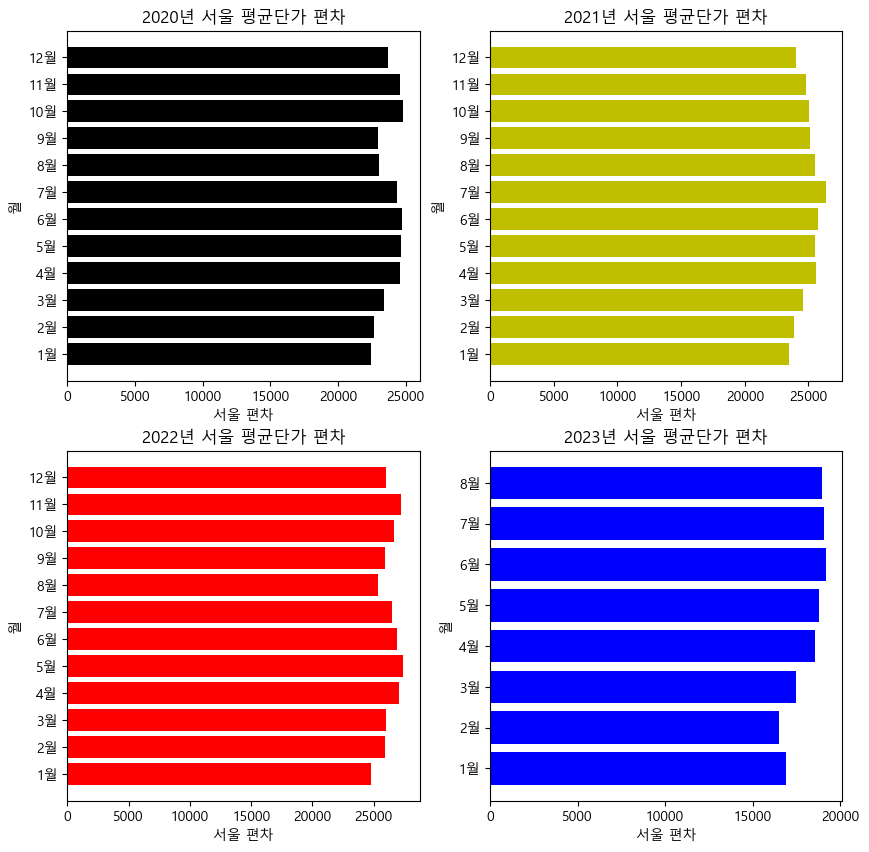

In [306]:
months = mean_all['Date'].dt.month.unique()
pltdata(months, mean_all, "서울")

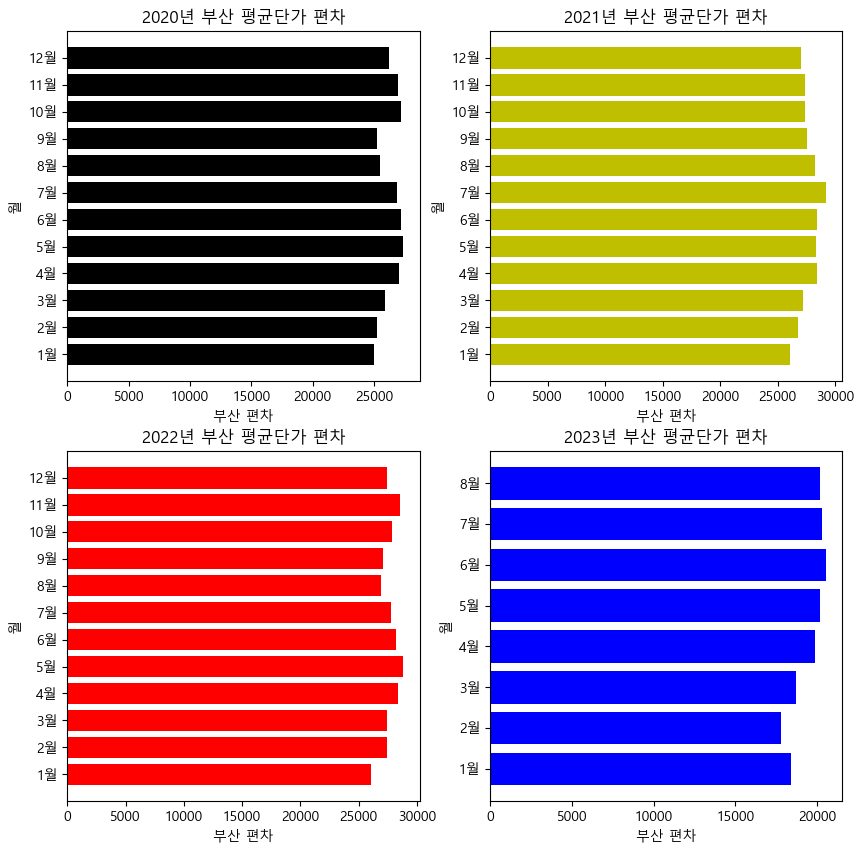

In [307]:
pltdata(months, mean_all, "부산")

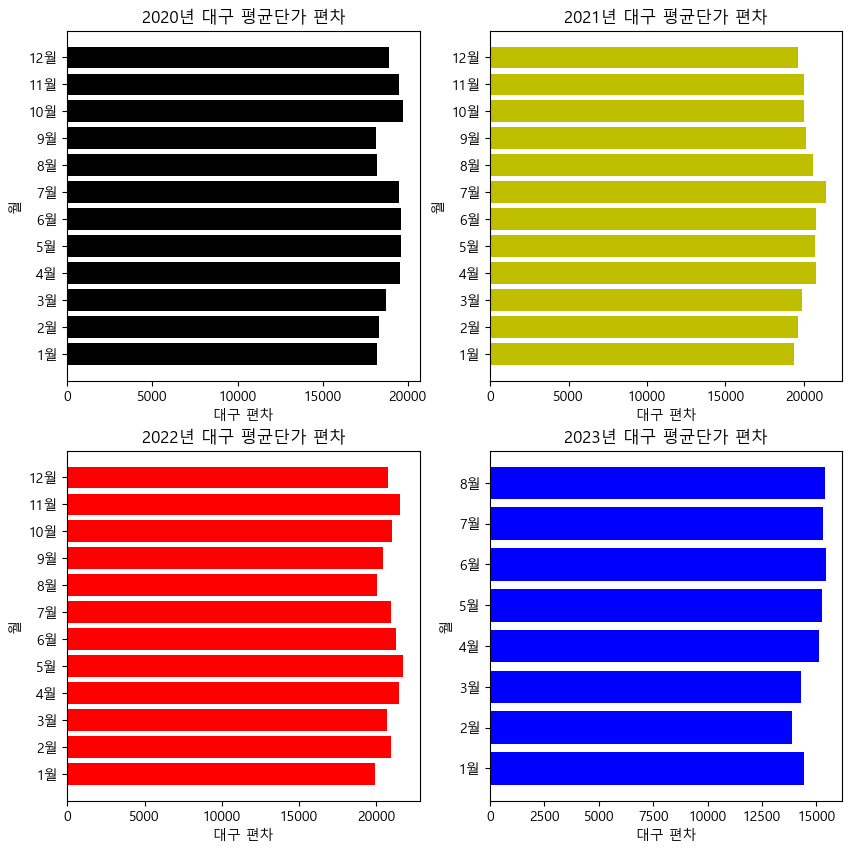

In [308]:
pltdata(months, mean_all, "대구")

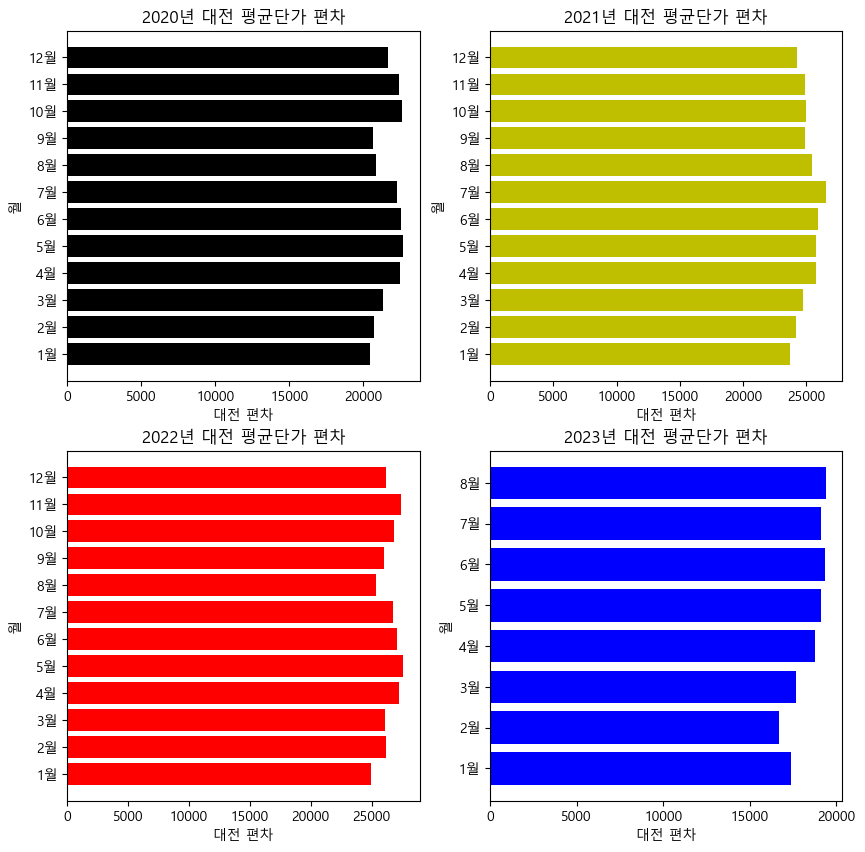

In [309]:
pltdata(months, mean_all, "대전")

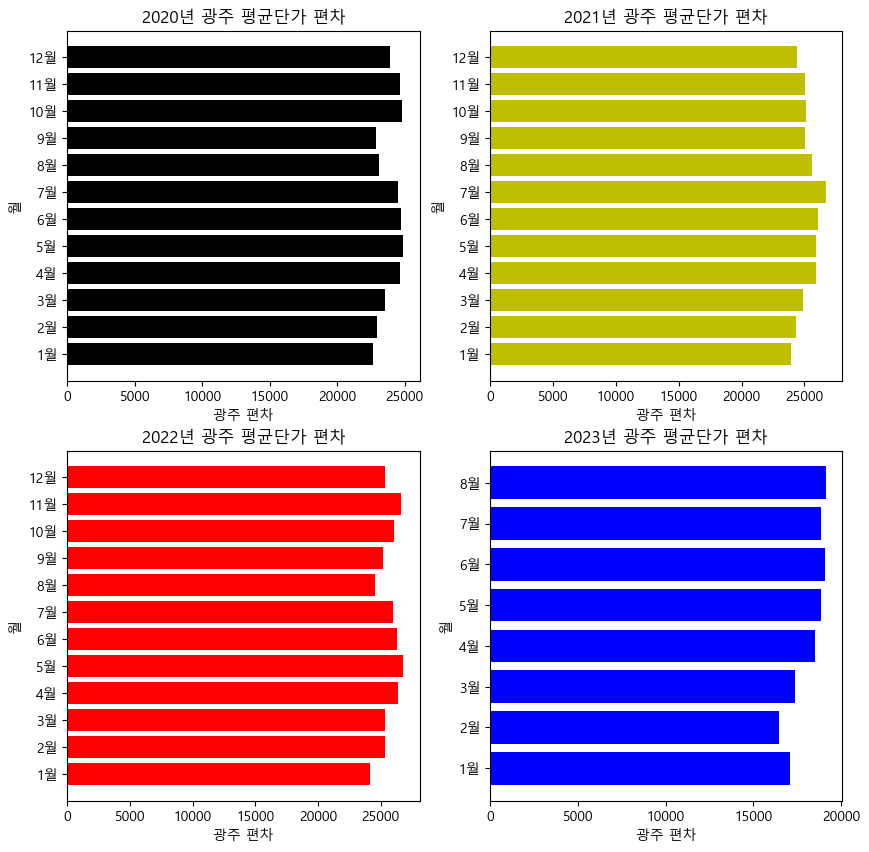

In [310]:
pltdata(months, mean_all, "광주")

In [311]:
get_data['전국 평균단가'] = (get_data['서울 총거래금액'] + get_data['부산 총거래금액'] + get_data['대구 총거래금액'] + get_data['대전 총거래금액'] + get_data['광주 총거래금액']) / (get_data['서울 총거래물량'] + get_data['부산 총거래물량'] + get_data['대구 총거래물량'] + get_data['대전 총거래물량'] + get_data['광주 총거래물량']) 

In [312]:
get_data.head()

,Date,서울 총거래물량,서울 총거래금액,서울 평균단가,서울 평균단가 편차,부산 총거래물량,부산 총거래금액,부산 평균단가,부산 평균단가 편차,대구 총거래물량,...,대구 평균단가 편차,대전 총거래물량,대전 총거래금액,대전 평균단가,대전 평균단가 편차,광주 총거래물량,광주 총거래금액,광주 평균단가,광주 평균단가 편차,전국 평균단가
0,2020-01-01,2780377.65,9830108400,3535.529931,22452.542192,314022.5,1158346710,3688.737941,25041.342430,810553.0,...,18213.930881,430426.0,1337955110,3108.443983,20480.408708,478129.0,1644281360,3438.991067,22661.976441,3324.666248
1,2020-02-01,2720669.88,9024401700,3316.977839,22671.094283,331341.0,1143201466,3450.226401,25279.853969,827334.0,...,18330.966036,406261.0,1228049490,3022.809204,20729.659259,451781.0,1441064160,3189.740516,22911.226992,3127.164424
2,2020-03-01,3739541.28,9722242800,2599.849038,23388.223084,435282.4,1220358529,2803.601820,25926.478550,978456.0,...,18743.904584,520843.0,1246237300,2392.731207,21349.931079,587348.0,1509172300,2569.468697,23531.498812,2496.717006
3,2020-04-01,5703989.95,7969557560,1397.189972,24590.882150,607195.5,995696080,1639.827831,27090.252539,1427859.0,...,19540.178870,615618.0,884077957,1436.082046,22478.016491,800667.0,1154068030,1441.383284,24659.584224,1386.114372
4,2020-05-01,5487463.43,7107073600,1295.147328,24692.924794,644394.2,875168986,1358.126727,27371.953643,1371680.0,...,19603.990919,631163.0,818889984,1297.430274,22684.541148,759615.0,938017136,1234.858627,24866.108881,1267.346727


In [313]:
years = get_data['Date'].dt.year.unique()
months = get_data['Date'].dt.month.unique()
all_grade_data = []
for i in years:
    for j in months:
        if ( i != 2023 ) or ( j not in [9, 10, 11, 12]):
            g_date = str(i)+"-"+str(j)
            total_data = year_df.loc[year_df['year']==i, '전국 평균단가'].values
            total_data1 = get_data.loc[(get_data['Date'].dt.month == j) & (get_data['Date'].dt.year==i), '전국 평균단가'].values
            total_grade = total_data - total_data1

            all_grade_data.append([g_date,total_grade[0]])
print(all_grade_data)

[['2020-1', -1372.6737629937745], ['2020-2', -1175.1719396070373], ['2020-3', -544.7245211032612], ['2020-4', 565.8781132858703], ['2020-5', 684.6457574607098], ['2020-6', 693.3455775554817], ['2020-7', 409.49700732280917], ['2020-8', -950.6002993963123], ['2020-9', -1036.5615568230926], ['2020-10', 765.6285753700911], ['2020-11', 511.0563856349777], ['2020-12', -272.5275730058381], ['2021-1', -1533.9131244154933], ['2021-2', -1094.5544814068453], ['2021-3', -548.2440373511299], ['2021-4', 468.24703055487976], ['2021-5', 396.7025621060691], ['2021-6', 554.8992293816395], ['2021-7', 1191.6749709683481], ['2021-8', 340.2475366069766], ['2021-9', -124.55052490598109], ['2021-10', -210.41202448836248], ['2021-11', -335.4279853787257], ['2021-12', -1005.8754079414216], ['2022-1', -1533.6236008737433], ['2022-2', -420.37497500251766], ['2022-3', -389.8466866325148], ['2022-4', 589.5557399828576], ['2022-5', 913.4551753061387], ['2022-6', 416.9073641720115], ['2022-7', 64.03933356797643], ['2

In [314]:
total_df = pd.DataFrame(all_grade_data, columns=['Date', '전국 평균단가 편차'])

In [315]:
total_df['Date'] = pd.to_datetime(total_df['Date'])

In [316]:
total_all = pd.merge(get_data, total_df, on='Date', how='inner')

In [317]:
total_all.head()

,Date,서울 총거래물량,서울 총거래금액,서울 평균단가,서울 평균단가 편차,부산 총거래물량,부산 총거래금액,부산 평균단가,부산 평균단가 편차,대구 총거래물량,...,대전 총거래물량,대전 총거래금액,대전 평균단가,대전 평균단가 편차,광주 총거래물량,광주 총거래금액,광주 평균단가,광주 평균단가 편차,전국 평균단가,전국 평균단가 편차
0,2020-01-01,2780377.65,9830108400,3535.529931,22452.542192,314022.5,1158346710,3688.737941,25041.342430,810553.0,...,430426.0,1337955110,3108.443983,20480.408708,478129.0,1644281360,3438.991067,22661.976441,3324.666248,-1372.673763
1,2020-02-01,2720669.88,9024401700,3316.977839,22671.094283,331341.0,1143201466,3450.226401,25279.853969,827334.0,...,406261.0,1228049490,3022.809204,20729.659259,451781.0,1441064160,3189.740516,22911.226992,3127.164424,-1175.171940
2,2020-03-01,3739541.28,9722242800,2599.849038,23388.223084,435282.4,1220358529,2803.601820,25926.478550,978456.0,...,520843.0,1246237300,2392.731207,21349.931079,587348.0,1509172300,2569.468697,23531.498812,2496.717006,-544.724521
3,2020-04-01,5703989.95,7969557560,1397.189972,24590.882150,607195.5,995696080,1639.827831,27090.252539,1427859.0,...,615618.0,884077957,1436.082046,22478.016491,800667.0,1154068030,1441.383284,24659.584224,1386.114372,565.878113
4,2020-05-01,5487463.43,7107073600,1295.147328,24692.924794,644394.2,875168986,1358.126727,27371.953643,1371680.0,...,631163.0,818889984,1297.430274,22684.541148,759615.0,938017136,1234.858627,24866.108881,1267.346727,684.645757


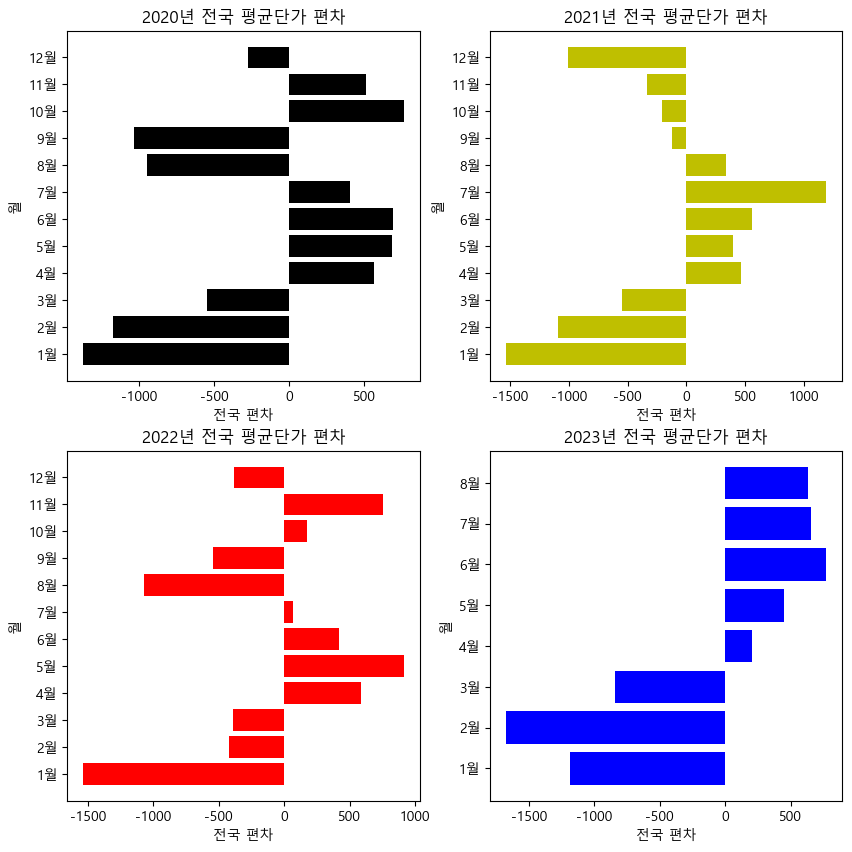

In [318]:
pltdata(months, total_all, "전국")

In [319]:
months[:9]

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [320]:

def areadata(month, data, crop, area1, area2):
    plt.figure(figsize=(10,10))
    data['Date'] = pd.to_datetime(data['Date'])
    plt.subplot(2,2,1)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area1], height=0.4, label=area1)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area2], height=0.4, label=area2)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2020년 지역별 %s 평균단가 편차' % crop)
    plt.legend()
    
    plt.subplot(2,2,2)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area1], height=0.4, label=area1)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area2], height=0.4, label=area2)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2021년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.subplot(2,2,3)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area1], height=0.4, label=area1)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area2], height=0.4, label=area2)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2022년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.subplot(2,2,4)
    plt.barh(month[:8]+0.2, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차' % area1], height=0.4, label=area1)
    plt.barh(month[:8]-0.2, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area2], height=0.4, label=area2)
    plt.ylabel('월')
    plt.yticks(month[:8], [f'{i}월' for i in month[:8]])
    plt.xlabel('%s 편차' %crop)
    plt.title('2023년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.savefig('../data/각 년도 별 두 지역의 %s 평균 단가 편차.png' % crop)
    plt.show()

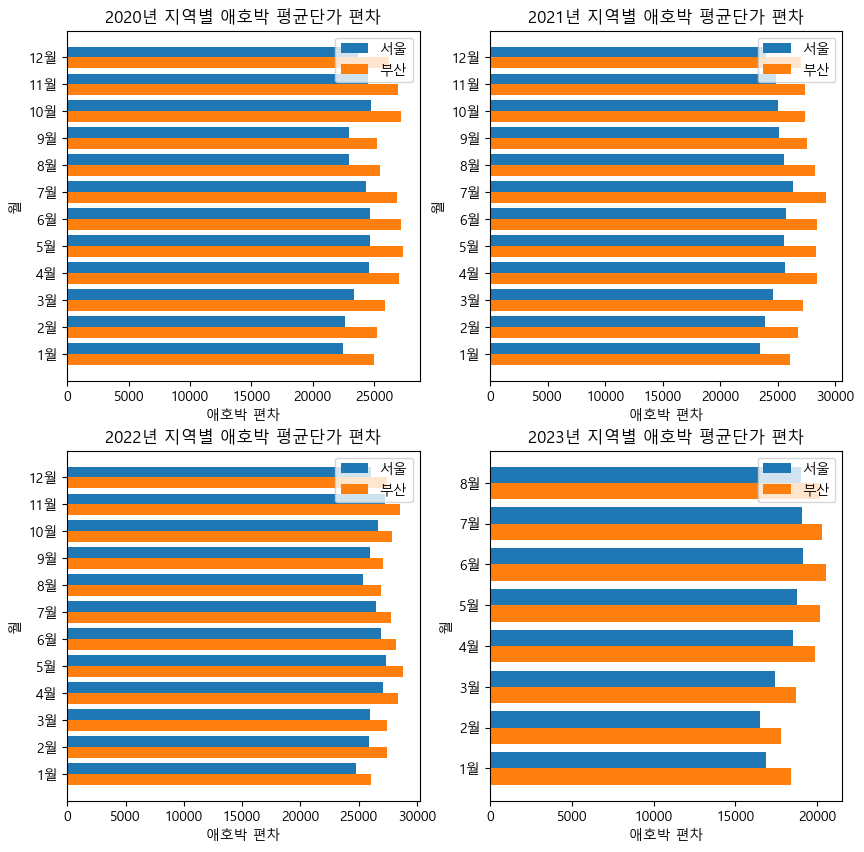

In [321]:
areadata(months, mean_all, "애호박", "서울", "부산")

In [322]:

def multiareadata(month, data, crop, area1, area2, area3, area4, area5):
    plt.figure(figsize=(10,10))
    data['Date'] = pd.to_datetime(data['Date'])
    plt.subplot(2,2,1)
    plt.barh(month+0.4, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area1], height=0.2, label=area1)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area2], height=0.2, label=area2)
    plt.barh(month, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area3], height=0.2, label=area3)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area4], height=0.2, label=area4)
    plt.barh(month-0.4, data.loc[data['Date'].dt.year == 2020, '%s 평균단가 편차'% area5], height=0.2, label=area5)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2020년 지역별 %s 평균단가 편차' % crop)
    plt.legend()
    
    plt.subplot(2,2,2)
    plt.barh(month+0.4, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area1], height=0.2, label=area1)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area2], height=0.2, label=area2)
    plt.barh(month, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area3], height=0.2, label=area3)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area4], height=0.2, label=area4)
    plt.barh(month-0.4, data.loc[data['Date'].dt.year == 2021, '%s 평균단가 편차'% area5], height=0.2, label=area5)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2021년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.subplot(2,2,3)
    plt.barh(month+0.4, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area1], height=0.2, label=area1)
    plt.barh(month+0.2, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area2], height=0.2, label=area2)
    plt.barh(month, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area3], height=0.2, label=area3)
    plt.barh(month-0.2, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area4], height=0.2, label=area4)
    plt.barh(month-0.4, data.loc[data['Date'].dt.year == 2022, '%s 평균단가 편차'% area5], height=0.2, label=area5)
    plt.ylabel('월')
    plt.yticks(month, [f'{i}월' for i in month])
    plt.xlabel('%s 편차' %crop)
    plt.title('2022년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.subplot(2,2,4)
    plt.barh(month[:8]+0.4, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area1], height=0.2, label=area1)
    plt.barh(month[:8]+0.2, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area2], height=0.2, label=area2)
    plt.barh(month[:8], data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area3], height=0.2, label=area3)
    plt.barh(month[:8]-0.2, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area4], height=0.2, label=area4)
    plt.barh(month[:8]-0.4, data.loc[data['Date'].dt.year == 2023, '%s 평균단가 편차'% area5], height=0.2, label=area5)
    plt.ylabel('월')
    plt.yticks(month[:8], [f'{i}월' for i in month[:8]])
    plt.xlabel('%s 편차' %crop)
    plt.title('2023년 지역별 %s 평균단가 편차' % crop)
    plt.legend()

    plt.savefig('../data/각 년도 별 지역별 %s 평균 단가 편차.png' % crop)
    plt.show()

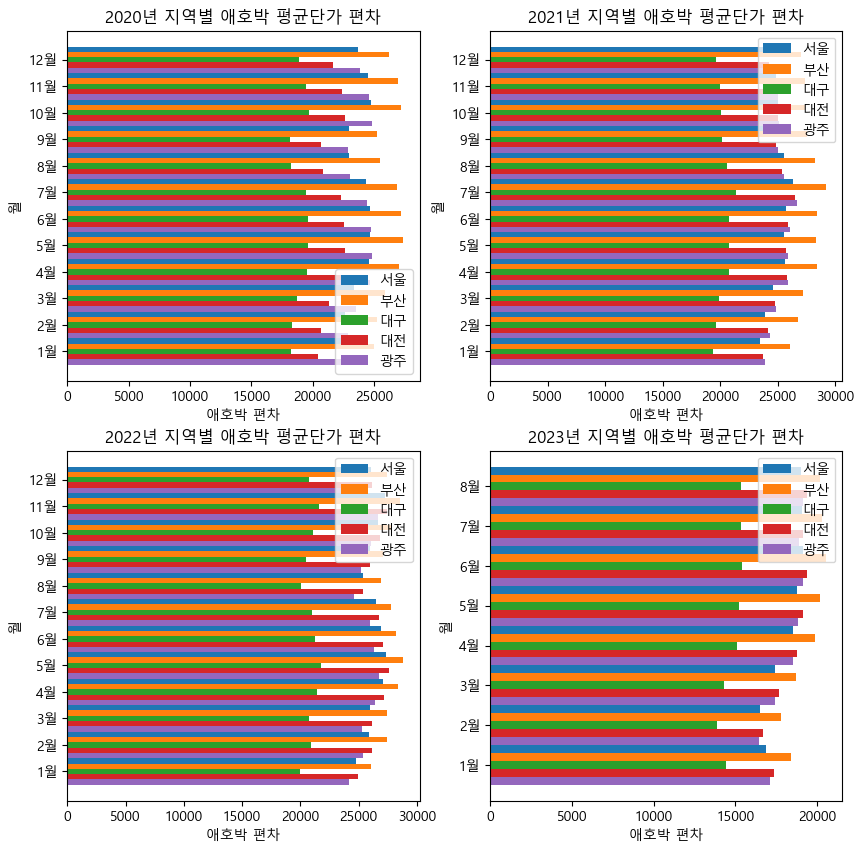

In [323]:
multiareadata(months, mean_all, "애호박", "서울", "부산", "대구", "대전", "광주")